In [25]:
import numpy as np
from scipy import signal
from matplotlib import pyplot as plt
from loadTDMS import load_tdms
from fft_myself import *

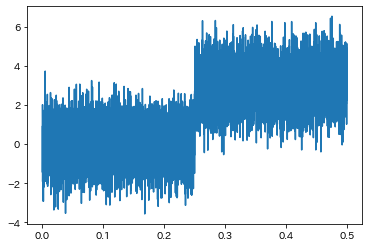

In [4]:
samplerate = 25600
x = np.arange(0, 12800) / samplerate                    # 波形生成のための時間軸の作成
data = np.random.normal(loc=0, scale=1, size=len(x))    # ガウシアンノイズを生成
data2=np.random.normal(loc=0, scale=1, size=len(x))+3
data3=np.concatenate([data[0:int(len(x)/2)],data2[0:int(len(x)/2)]])
plt.plot(x,data3)

In [5]:
def highpass(x, samplerate, fp, fs, gpass, gstop):
    fn = samplerate / 2   #ナイキスト周波数
    wp = fp / fn  #ナイキスト周波数で通過域端周波数を正規化
    ws = fs / fn  #ナイキスト周波数で阻止域端周波数を正規化
    N, Wn = signal.buttord(wp, ws, gpass, gstop)  #オーダーとバターワースの正規化周波数を計算
    b, a = signal.butter(N, Wn, "high")   #フィルタ伝達関数の分子と分母を計算
    y = signal.filtfilt(b, a, x)    #信号に対してフィルタをかける
    return y  

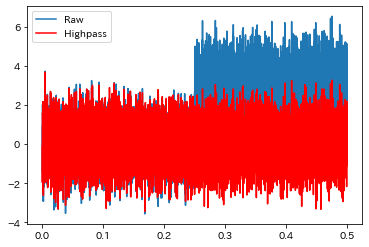

In [6]:
fp=600 # 通過域端周波数[Hz]
fs=300# 阻止域端周波数[Hz]
gpass = 3 # 通過域端最大損失[dB]
gstop = 40 # 阻止域端最小損失[dB]


data_hifilt = highpass(data3, samplerate, fp, fs, gpass, gstop)
plt.plot(x,data3)
plt.plot(x,data_hifilt,'r')
plt.legend(['Raw','Highpass'])

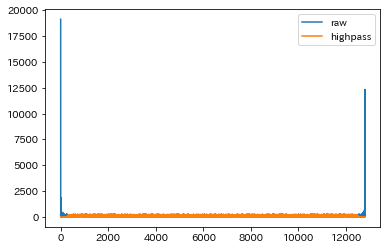

In [9]:
F = np.abs( np.fft.fft(data3) )
F_h = np.abs( np.fft.fft(data_hifilt) )
plt.plot(F)
plt.plot(F_h)
plt.legend(['raw', 'highpass'])

In [11]:
path = r'C:\Users\pmg07\Desktop\2021_1115_切削実験\ae\AE_368.tdms'
d = load_tdms(path, ch_num=3)

In [23]:
dt = 1/10**6
# y = d[0]
y = d[0][5000000:5016385]
# y = d[0][5000000:5000033]
N = len(y)
t = np.linspace(0, N*dt, N)
split_t_r = 0.1
overlap = 0.5
window_F = "hanning" 
y_label = "amplitude"
y_unit = "V"
output_FN = "haha"

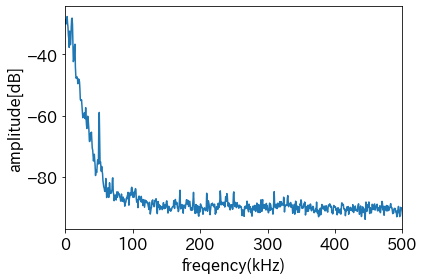

In [26]:
fft_r = FFT_main(t, y, dt, split_t_r, overlap, window_F, output_FN, y_label, y_unit)

In [27]:
fp=600000 # 通過域端周波数[Hz]
fs=300000# 阻止域端周波数[Hz]
gpass = 3 # 通過域端最大損失[dB]
gstop = 40 # 阻止域端最小損失[dB]


data_hifilt = highpass(d, samplerate, fp, fs, gpass, gstop)

KeyboardInterrupt: 

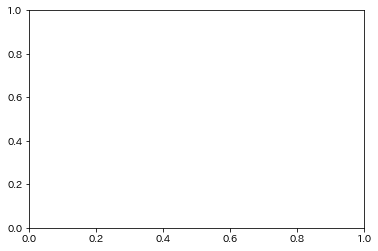

In [37]:
plt.plot(data_hifilt)